In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
#You are building a more complex data set.
X1, y1 = make_gaussian_quantiles(cov=2.,
n_samples=2000, n_features=2,
n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
n_samples=3000, n_features=2,
n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

#You now have a data set ready. Create and fit an AdaBoosted decision tree to the dataset.
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
algorithm="SAMME",
n_estimators=200)

#You train the model.
bdt.fit(X, y)

#You now need to set up a few parameters that you will require.
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

<Figure size 720x360 with 0 Axes>

(-5.333350262832122, 8.066649737167593, -5.4595208730704226, 8.840479126929273)

(-5.333350262832122, 8.067474174107211)

(-5.4595208730704226, 8.848278359647372)

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Decision Boundary')

(array([  37.,   75.,  269., 1235.,  821.,   63.,    0.,    0.,    0.,
           0.]),
 array([-0.57225489, -0.44886374, -0.32547259, -0.20208144, -0.0786903 ,
         0.04470085,  0.168092  ,  0.29148315,  0.4148743 ,  0.53826545,
         0.6616566 ]),
 <a list of 10 Patch objects>)

(array([   0.,    0.,    2.,   53.,  444., 1542.,  305.,  129.,    3.,
          22.]),
 array([-0.57225489, -0.44886374, -0.32547259, -0.20208144, -0.0786903 ,
         0.04470085,  0.168092  ,  0.29148315,  0.4148743 ,  0.53826545,
         0.6616566 ]),
 <a list of 10 Patch objects>)

(-0.6339504683160793, 0.7233521770829134, 0.0, 1942.9199999999998)

Text(0, 0.5, 'Samples')

Text(0.5, 0, 'Score')

Text(0.5, 1.0, 'Decision Scores')

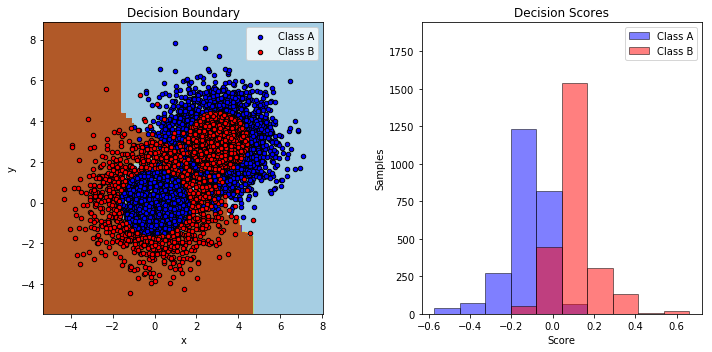

In [4]:
#You now create a visualization of the results.
plt.figure(figsize=(10, 5))

#Add the plot for the decision boundaries.
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

#Plot your training points.
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
    c=c, cmap=plt.cm.Paired,
    s=20, edgecolor='k',
    label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

#Plot the two-class decision scores.
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)

for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
    bins=10,
    range=plot_range,
    facecolor=c,
    label='Class %s' % n,
    alpha=.5,
    edgecolor='k')
    
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()